In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns              #load the libraries

In [2]:
data = pd.read_csv("salary_data.csv") #reading csv file
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Performing EDA

### 1. Knowing general information and getting data ready

In [3]:
# data.shape               #it tells about no. of records and features
# data.columns             #determines column names
# data.dtypes              #checking data types
# data.isna().sum()        #checking --- is there any null value or not

In [4]:
data.info()               #gives information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data[data.duplicated()].shape       #checking no. of duplicate records

(0, 2)

In [6]:
data.describe()                     #gives description about data

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### 2. data visualization

#### a) scatterplot

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

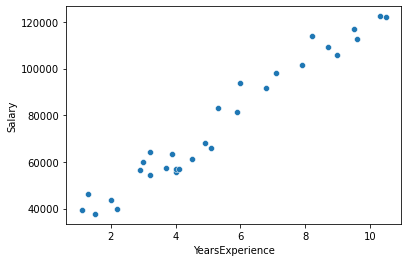

In [7]:
sns.scatterplot(x=data['YearsExperience'],y = data['Salary'])    #data is scattered along a straight line (linear regression)

#### b) line plot

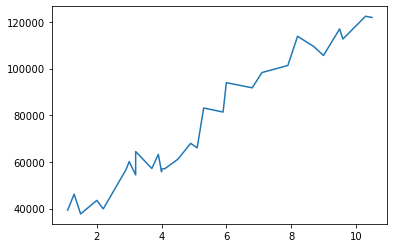

In [8]:
plt.plot(data['YearsExperience'],data['Salary'])                  #just ploting how original data's line plot look like

#### c) boxplot

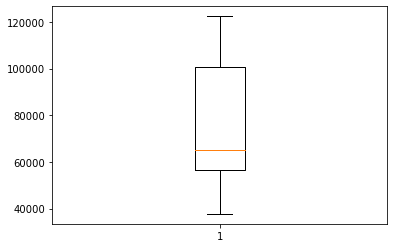

In [9]:
box=plt.boxplot(data.Salary)            #checking outliers
                                        #here no outlier and curve is right skewed and orange line denotes median

#### d-1) influential points using cook's distance (method 1)

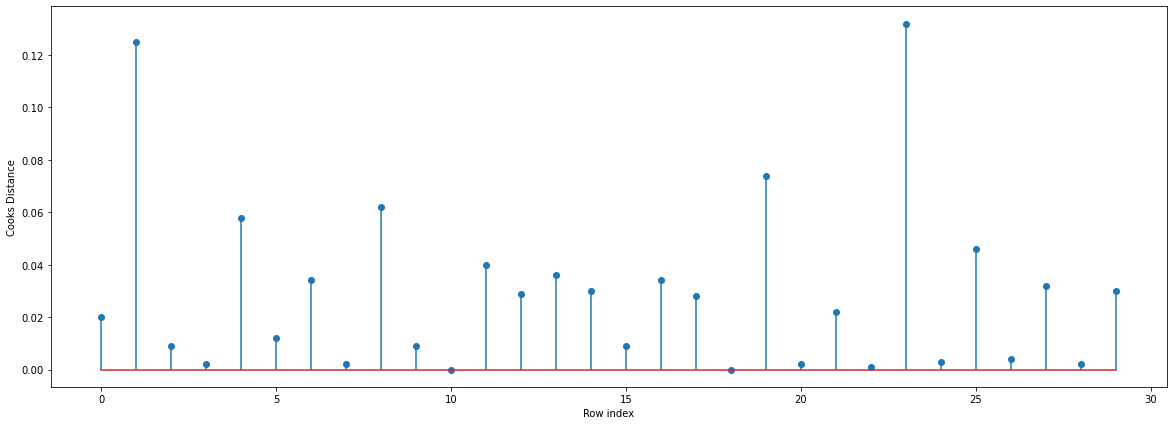

point having maximum cook's distance is : 


(23, 0.13175452313135294)

In [10]:
import statsmodels.formula.api as smf 
model = smf.ols('Salary~YearsExperience',data=data).fit()

model_influence = model.get_influence()
(c , _) = model_influence.cooks_distance

fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

print("point having maximum cook's distance is : ")
(np.argmax(c),np.max(c))      #we got no influential point

#### d-2) influential points using bubble method (method 2)

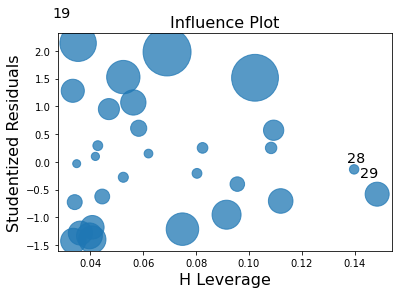

leverage_cutoff is :  0.30000000000000004


In [11]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)                               #k = no. of columns ; n = no. of records
print("leverage_cutoff is : ",leverage_cutoff)                #we got no influential point 
                                     #point having leverage value greater than leverage cutoff is actually a influential point

### 3. Correlation

In [12]:
data.corr()                                  #if we got good correlation between x and y then we can go for model building

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# fitting of simple linear regression

### 1. ols method (using statmodels package)

#### a) building model

In [13]:
import statsmodels.formula.api as sms
model = sms.ols("Salary~YearsExperience",data=data).fit()           #we cann't use y~x in case of ols method
print(model.summary())

#we get good value for R-squared
#
#null hypothesis : beta_1 (coeff. of YearsExperience) = 0
#alternate hypothesis : beta_1 != 0
#p-low  null-go , hence null hypothesis rejected and alternate hypothesis accepted it means there is a relation between x and y
#note : x = YearsExperience    y = Salary

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           1.14e-20
Time:                        03:14:01   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     

#### b) prediction for given data

   YearsExperience   Salary  predicted_sal
0              1.1  39343.0   36187.158752
1              1.3  46205.0   38077.151217
2              1.5  37731.0   39967.143681
3              2.0  43525.0   44692.124842
4              2.2  39891.0   46582.117306


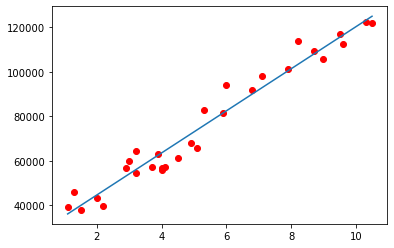

In [14]:
pred = model.predict(data["YearsExperience"])
predicted_sal = pd.Series(data = pred,name='predicted_sal')

data1=pd.concat([data,predicted_sal],axis=1)
print(data1.head())

plt.scatter(data["YearsExperience"], data["Salary"], color='red')
plt.plot(data["YearsExperience"],pred)

#### c) prediction for new value

In [15]:
# value = float(input("enter experience for which you want to find salary "))   #here float is used for ols method only
# valueseries=pd.Series([value])
# valuedf=pd.DataFrame(valueseries,columns=['YearsExperience'])
# valuedf

# salary=model.predict(valuedf)
# print("salary for experience : ",value, " years is : ",salary)

### 2. LeaveOneOut Model Validation Technique

In [16]:
x = data.iloc[:, :-1].values    #separating the dependent and independent features 
                                #[note:here -1 indicates till 2nd last column]
y = data.iloc[:, -1].values     #x - year of experience (independent); y - salary (dependent)
                                #[note:y's value row vector ki form m likhte h]

#### a) building model

In [17]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
loocv = LeaveOneOut()
loocv.get_n_splits(x)
print(loocv)
model = LinearRegression()
model.fit(x,y)
results = cross_val_score(model, x, y, cv=3)
print(results)
results.mean()*100.0

LeaveOneOut()
[0.42772573 0.63293326 0.71542639]


59.20284587713647

#### b) prediction for given data

   YearsExperience   Salary  predicted_sal
0              1.1  39343.0   36187.158752
1              1.3  46205.0   38077.151217
2              1.5  37731.0   39967.143681
3              2.0  43525.0   44692.124842
4              2.2  39891.0   46582.117306


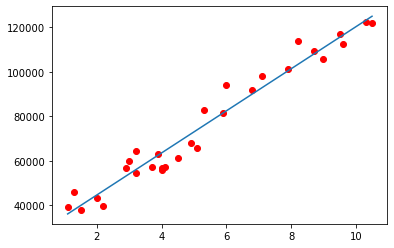

In [18]:
pred = model.predict(x)
predicted_sal = pd.Series(data = pred,name='predicted_sal')

data1=pd.concat([data,predicted_sal],axis=1)
print(data1.head())

plt.scatter(x, y, color='red')
plt.plot(x,pred)

#### c) prediction for new value

In [19]:
# value = input("enter experience for which you want to find salary")
# valueseries=pd.Series([value])
# valuedf=pd.DataFrame(valueseries,columns=['experience'])
# valuedf

# salary=model.predict(valuedf)
# print("salary for person having",value, "experience is : ",salary)

### 3. KFold Model Validation Technique

In [20]:
x = data.iloc[:, :-1].values    #separating the dependent and independent features 
                                #[note:here -1 indicates till 2nd last column]
y = data.iloc[:, -1].values     #x - year of experience (independent); y - salary (dependent)
                                #[note:y's value row vector ki form m likhte h]

#### a) building model

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
kfold = KFold(n_splits=5,shuffle=True, random_state=42)
model = LinearRegression()
model.fit(x,y)
results = cross_val_score(model, x, y, cv=kfold)
print(results)
results.mean()*100.0

[0.90244618 0.96846325 0.91621488 0.98161851 0.84333552]


92.2415665403513

#### b) prediction for given data

   YearsExperience   Salary  predicted_sal
0              1.1  39343.0   36187.158752
1              1.3  46205.0   38077.151217
2              1.5  37731.0   39967.143681
3              2.0  43525.0   44692.124842
4              2.2  39891.0   46582.117306


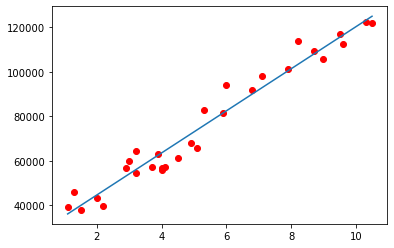

In [22]:
pred = model.predict(x)
predicted_sal = pd.Series(data = pred,name='predicted_sal')

data1=pd.concat([data,predicted_sal],axis=1)
print(data1.head())

plt.scatter(x, y, color='red')
plt.plot(x,pred)

#### c) prediction for new value

In [23]:
# value = input("enter experience for which you want to find salary")
# valueseries=pd.Series([value])
# valuedf=pd.DataFrame(valueseries,columns=['experience'])
# valuedf

# salary=model.predict(valuedf)
# print("salary for person having",value, "experience is : ",salary)

### 4. train_test_split Model Validation Technique

In [24]:
x = data.iloc[:, :-1].values    #separating the dependent and independent features 
                                #[note:here -1 indicates till 2nd last column]
y = data.iloc[:, -1].values     #x - year of experience (independent); y - salary (dependent)
                                #[note:y's value row vector ki form m likhte h]

#### a) building model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20,random_state=7)
model = LinearRegression()
model.fit(X_train, Y_train)
result1 = model.score(X_train, Y_train)
result2 = model.score(X_test, Y_test)
print(result1)
print(result2)

0.9588633130416467
0.8143022783109005


#### b) prediction for given data

   YearsExperience   Salary  predicted_sal
0              1.1  39343.0   35474.515541
1              1.3  46205.0   37385.368782
2              1.5  37731.0   39296.222022
3              2.0  43525.0   44073.355124
4              2.2  39891.0   45984.208364


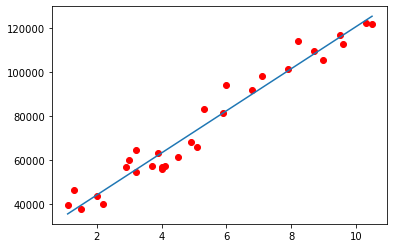

In [26]:
pred = model.predict(x)
predicted_sal = pd.Series(data = pred,name='predicted_sal')

data1=pd.concat([data,predicted_sal],axis=1)
print(data1.head())

plt.scatter(x, y, color='red')
plt.plot(x,pred)

#### c) prediction for new value

In [27]:
# value = input("enter experience for which you want to find salary")
# valueseries=pd.Series([value])
# valuedf=pd.DataFrame(valueseries,columns=['experience'])
# valuedf

# salary=model.predict(valuedf)
# print("salary for person having",value, "experience is : ",salary)